In [ ]:
%%writefile analyze_config.yaml

dataset_source: CONFIG
dataset_name: "HuggingFaceDataset"
dataset_path: "/home/shanghong/oumi/configs/recipes/enterprise/multilingual_thinking_train.json"
dataset_format: "oumi"
split: "train"
output_path: "."
analyzers:
  - id: "text_length_analyzer"
    params: {"char_count": True, "word_count": True, "token_count": True}
is_multimodal: False

Overwriting analyze_config.yaml


In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-7B-Instruct")

In [2]:
from oumi.core.analyze import DatasetAnalyzer
from oumi.core.configs import AnalyzeConfig, DatasetSource, SampleAnalyzerParams

config = AnalyzeConfig(
    dataset_source=DatasetSource.CONFIG,  # Required field
    dataset_name="text_sft",
    dataset_path="/home/shanghong/oumi/enterprise_experiments/data/open_thoughts_small_1k_train.json",
    dataset_format="oumi",
    split="train",
    output_path="test_output",
    analyzers=[
        SampleAnalyzerParams(
            id="length",
            params={
                "char_count": True,
                "word_count": True,
                "token_count": True,
                "tokenizer": tokenizer,
            },
        ),
    ],
    is_multimodal=False,
)

analyzer = DatasetAnalyzer(config)
analyzer.analyze_dataset()
results = analyzer.analysis_results
print(results)

[2025-10-23 01:12:14,214][oumi][rank0][pid:391803][MainThread][INFO]][base_map_dataset.py:91] Creating map dataset (type: TextSftJsonLinesDataset)... dataset_name: 'custom'
[2025-10-23 01:12:14,215][oumi.utils.analysis_utils][rank0][pid:391803][MainThread][INFO]][analysis_utils.py:261] Loaded text dataset from: /home/shanghong/oumi/enterprise_experiments/data/open_thoughts_small_1k_train.json
[2025-10-23 01:12:14,216][oumi][rank0][pid:391803][MainThread][INFO]][dataset_analyzer.py:159] Loaded dataset from config: text_sft
[2025-10-23 01:12:14,217][oumi][rank0][pid:391803][MainThread][INFO]][dataset_analyzer.py:275] Initialized sample analyzer: length
[2025-10-23 01:12:14,218][oumi][rank0][pid:391803][MainThread][INFO]][dataset_analyzer.py:301] Starting analysis of dataset: text_sft
[2025-10-23 01:12:14,219][oumi][rank0][pid:391803][MainThread][INFO]][dataset_analyzer.py:302] Using 1 sample analyzers: ['length']
[2025-10-23 01:12:14,220][oumi][rank0][pid:391803][MainThread][INFO]][datas

Converting text_sft to DataFrames: 100%|██████████| 1000/1000 [00:00<00:00, 1415.83item/s]


[2025-10-23 01:12:14,979][oumi][rank0][pid:391803][MainThread][WARNING]][dataframe_analyzer.py:101] Analyzer length failed: No text fields found in the DataFrame for length analysis. Please ensure your schema specifies columns withcontent_type='text'and that those columns exist in the DataFrame.
DatasetAnalysisResult(dataset_name='text_sft', total_conversations=1000, conversations_analyzed=1000)


In [3]:
analyzer.analysis_df

,conversation_index,conversation_id,num_messages,message_index,message_id,role,text_content,text_content_char_count,text_content_word_count,text_content_sentence_count,text_content_token_count
0,0,0,2,0,msg_0,user,Given the equation\n$$\frac{6}{\sqrt{x - 8} - ...,393,73,3,171
1,0,0,2,1,msg_1,assistant,"<think> Okay, so I have two equations here to ...",40758,6980,958,16622
2,1,1,2,0,msg_0,user,How many triangles are there whose vertices ar...,126,23,1,30
3,1,1,2,1,msg_1,assistant,"<think> Okay, so I need to figure out how many...",50721,8662,801,16762
4,2,2,2,0,msg_0,user,"A certain polyhedron has 16 faces, each of whi...",256,52,3,74
...,...,...,...,...,...,...,...,...,...,...,...
1995,997,997,2,1,msg_1,assistant,"<think> Okay, let's see. The problem is about ...",56008,10039,884,16698
1996,998,998,2,0,msg_0,user,Let $g(x) = \sqrt{x^2+1}$ and $\lfloor x\rfloo...,242,37,2,73
1997,998,998,2,1,msg_1,assistant,"<think> Okay, so I need to find the smallest p...",43363,7973,942,16720
1998,999,999,2,0,msg_0,user,"A theater is hosting a play with five actors, ...",424,75,3,85


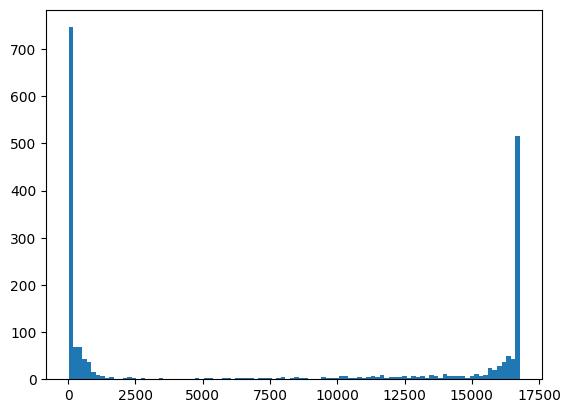

In [4]:
# plot the distribution of the conversation_length_token_count
import matplotlib.pyplot as plt

plt.hist(analyzer.analysis_df["text_content_token_count"], bins=100)
plt.show()

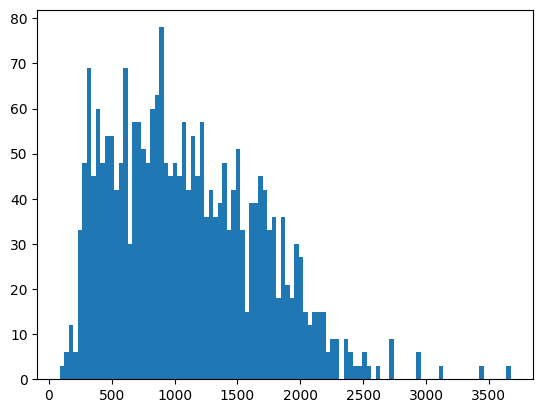

In [ ]:
# only plot distribution below 5k tokens
import matplotlib.pyplot as plt

plt.hist(
    analyzer.analysis_df["conversation_length_token_count"][
        analyzer.analysis_df["conversation_length_token_count"] < 5000
    ],
    bins=100,
)
plt.show()